# Numerical Encoding

## WithOut Encoding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import KBinsDiscretizer


In [4]:
data=pd.read_csv('../../data/titanic_train.csv')

In [5]:
data.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0,A14,S
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4,NaN,C


In [6]:
df=data[['Age','Fare','Survived']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [8]:
df.dropna(inplace=True)

C:\Users\shafe\AppData\Local\Temp\ipykernel_16964\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      714 non-null    float64
 2   Survived  714 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [10]:
df.sample(5)

,Age,Fare,Survived
649,23.0,7.5500,1
104,37.0,7.9250,0
75,25.0,7.6500,0
321,27.0,7.8958,0
226,19.0,10.5000,1


In [11]:
X=df.iloc[:,:2]
y=df.iloc[:,-1]

In [12]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [13]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=.2,
                                               shuffle=True,
                                               random_state=10)

In [15]:
X_train.head(10) 

,Age,Fare
343,25.0,13.0000
227,20.5,7.2500
317,54.0,14.0000
717,27.0,10.5000
30,40.0,27.7208
484,25.0,91.0792
345,24.0,13.0000
85,33.0,15.8500
98,34.0,23.0000
252,62.0,26.5500


In [16]:
model=DecisionTreeClassifier()

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [19]:
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(acc)
print(cross_val_score(model,X,y,cv=10,scoring='accuracy').mean())

0.6573426573426573
0.6345070422535211


## Discretization

In [79]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

In [80]:
col_transform=ColumnTransformer([
    ('age',kbin_age,[0]),
    ('fare',kbin_fare,[1])
])

In [81]:
col_transform

ColumnTransformer(transformers=[('age',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 [0]),
                                ('fare',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='uniform'),
                                 [1])])

In [82]:
col_transform.get_params()

{'force_int_remainder_cols': True,
 'n_jobs': None,
 'remainder': 'drop',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('age', KBinsDiscretizer(encode='ordinal', n_bins=10), [0]),
  ('fare',
   KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform'),
   [1])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'age': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'fare': KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform'),
 'age__dtype': None,
 'age__encode': 'ordinal',
 'age__n_bins': 10,
 'age__random_state': None,
 'age__strategy': 'quantile',
 'age__subsample': 200000,
 'fare__dtype': None,
 'fare__encode': 'ordinal',
 'fare__n_bins': 10,
 'fare__random_state': None,
 'fare__strategy': 'uniform',
 'fare__subsample': 200000}

In [83]:
X_tain_tansformed=col_transform.fit_transform(X_train)
X_test_transformed=col_transform.fit_transform(X_test)

In [84]:
transformed_age=X_tain_tansformed[:,0]
transformed_fare=X_tain_tansformed[:,1]

In [85]:
Comaparetive_data=pd.DataFrame({
    'age':X_train['Age'],
    'age_to_quantile_bin':transformed_age,
    'fare': X_train['Fare'],
    'fare_to_unifrom_bin': transformed_fare

})

Comaparetive_data.sample(5)

,age,age_to_quantile_bin,fare,fare_to_unifrom_bin
292,36.0,7.0,12.8750,0.0
501,21.0,2.0,7.7500,0.0
558,39.0,7.0,79.6500,1.0
296,23.5,3.0,7.2292,0.0
600,24.0,3.0,27.0000,0.0


<Axes: ylabel='Frequency'>

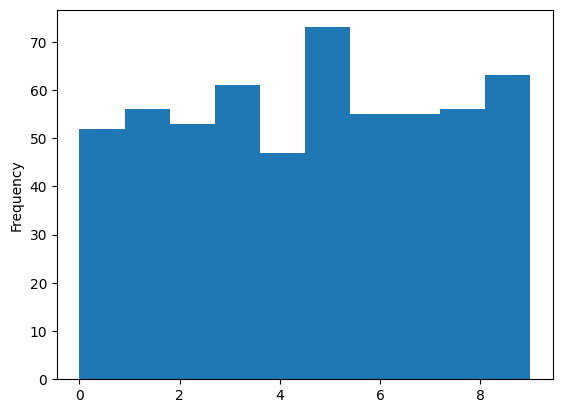

In [86]:
Comaparetive_data['age_to_quantile_bin'].plot(kind='hist')

<Axes: ylabel='Density'>

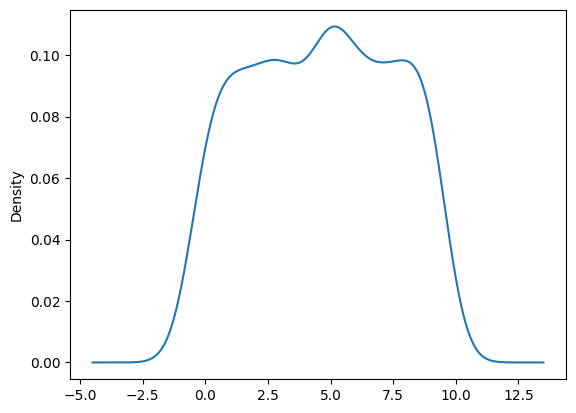

In [87]:
Comaparetive_data['age_to_quantile_bin'].plot(kind='kde')

<Axes: ylabel='Frequency'>

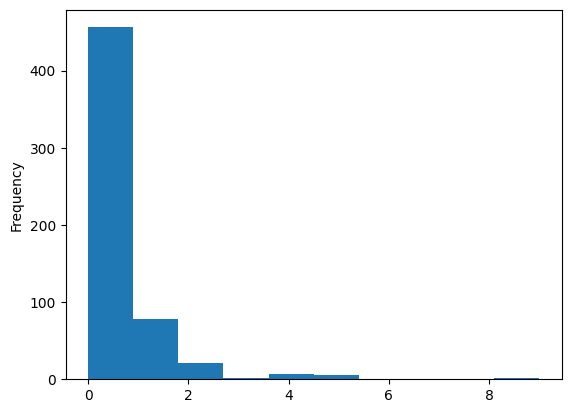

In [88]:
Comaparetive_data['fare_to_unifrom_bin'].plot(kind='hist')

<Axes: ylabel='Density'>

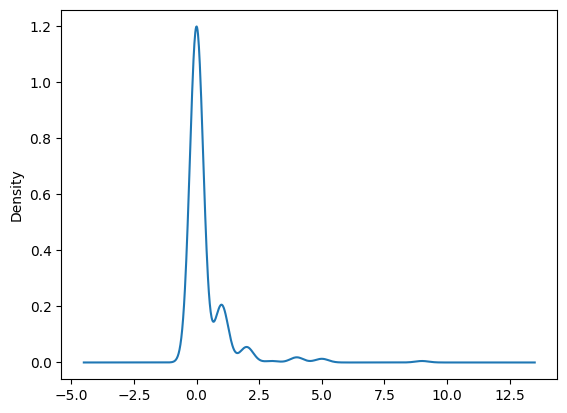

In [89]:
Comaparetive_data['fare_to_unifrom_bin'].plot(kind='kde')

In [90]:
fare_bin_edge=col_transform.named_transformers_['fare'].bin_edges_[0]

In [91]:
X_train['Fare'].describe()

count    571.000000
mean      35.112354
std       51.771433
min        0.000000
25%        8.050000
50%       15.741700
75%       35.500000
max      512.329200
Name: Fare, dtype: float64

In [92]:
fare_bin_edge

array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
       307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])

In [93]:
age_bin_edge=col_transform.named_transformers_['age'].bin_edges_[0]

In [94]:
X_train['Age'].describe()

count    571.000000
mean      29.958564
std       14.538359
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [95]:
lst=np.array(np.arange(0.1,1,.1))
X_train['Age'].quantile(.5)

28.0

In [96]:
age_bin_edge

array([ 0.83,  7.2 , 18.  , 21.6 , 25.  , 28.5 , 31.2 , 35.4 , 41.4 ,
       47.8 , 70.  ])

In [97]:
lst=X_train['Age']
lst=list(lst)
from numpy import sort

lst=sort(lst)

In [103]:
lst[:]

array([ 0.42,  0.67,  0.75,  0.75,  0.83,  0.92,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  2.  ,  3.  ,
        3.  ,  3.  ,  4.  ,  4.  ,  4.  ,  4.  ,  4.  ,  4.  ,  4.  ,
        4.  ,  4.  ,  5.  ,  5.  ,  6.  ,  6.  ,  7.  ,  7.  ,  8.  ,
        8.  ,  8.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  , 10.  ,
       10.  , 11.  , 11.  , 11.  , 11.  , 12.  , 13.  , 14.  , 14.  ,
       14.  , 14.  , 14.  , 14.  , 14.5 , 15.  , 15.  , 15.  , 15.  ,
       15.  , 16.  , 16.  , 16.  , 16.  , 16.  , 16.  , 16.  , 16.  ,
       16.  , 16.  , 16.  , 16.  , 16.  , 16.  , 16.  , 17.  , 17.  ,
       17.  , 17.  , 17.  , 17.  , 17.  , 17.  , 18.  , 18.  , 18.  ,
       18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  ,
       18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  , 18.  ,
       19.  , 19.  , 19.  , 19.  , 19.  , 19.  , 19.  , 19.  , 19.  ,
       19.  , 19.  , 19.  , 19.  , 19.  , 19.  , 19.  , 19.  , 20.  ,
       20.  , 20.  ,

In [104]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_tain_tansformed[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_tain_tansformed[:,1]
})

In [106]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=col_transform.named_transformers_['age'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=col_transform.named_transformers_['fare'].bin_edges_[0].tolist())

In [109]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
530,2.0,0.0,26.0000,0.0,"(0.83, 7.2]","(0.0, 51.233]"
207,26.0,4.0,18.7875,0.0,"(25.0, 28.5]","(0.0, 51.233]"
33,66.0,9.0,10.5000,0.0,"(47.8, 70.0]","(0.0, 51.233]"
258,35.0,6.0,512.3292,9.0,"(31.2, 35.4]","(461.096, 512.329]"
366,60.0,9.0,75.2500,1.0,"(47.8, 70.0]","(51.233, 102.466]"


In [114]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    acc=np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")
    plt.suptitle(f"Accuracy : {acc}")
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")
    plt.show()

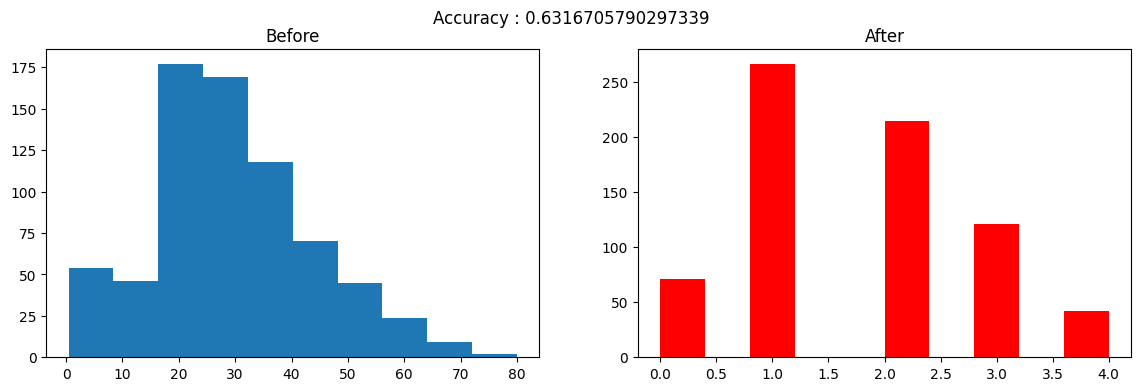

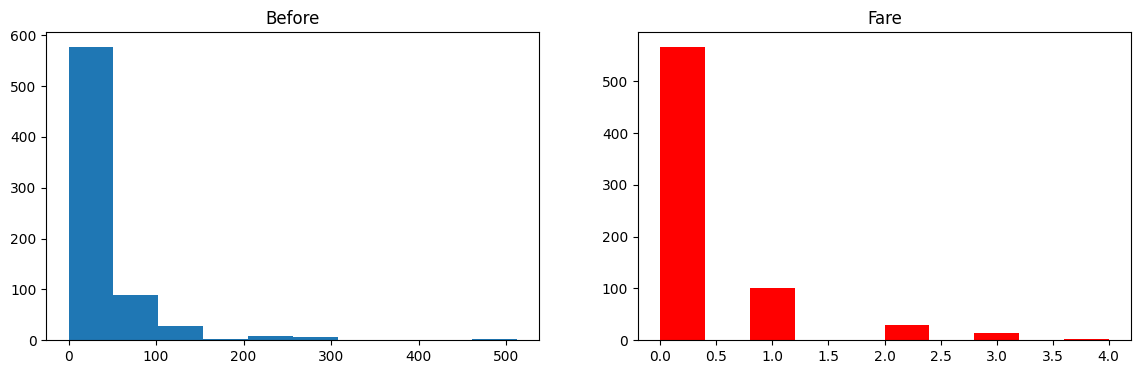

In [115]:
discretize(5,'kmeans')

## Binarization

In [116]:
data.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S


In [118]:
df=data[['Age','Fare']]

In [123]:
df['family']=data['SibSp']+data['Parch']
df['Survived']=data['Survived']

C:\Users\shafe\AppData\Local\Temp\ipykernel_16964\2161526730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family']=data['SibSp']+data['Parch']
C:\Users\shafe\AppData\Local\Temp\ipykernel_16964\2161526730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived']=data['Survived']


In [124]:
df.sample(5)

,Age,Fare,family,Survived
24,8.0,21.075,4,0
564,NaN,8.050,0,0
85,33.0,15.850,3,1
845,42.0,7.550,0,0
12,20.0,8.050,0,0


In [125]:
df.dropna(inplace=True)

C:\Users\shafe\AppData\Local\Temp\ipykernel_16964\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [126]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [128]:
X_train.head()


,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [129]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6153846153846154

In [130]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6499217527386542

In [131]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [132]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [133]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [134]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [135]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6013986013986014

In [136]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6234154929577465